In [33]:
import pandas as pd
# import ydata_profiling  as ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve



from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('Datasets\diabetes.csv')
# profile = ProfileReport.ProfileReport(df, title="Profiling Report")
# profile.to_file("output.html")


In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
target = 'Outcome'
X = df.drop(columns=target)
y = df[target]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [39]:
## use after train_test_split to avoid data leakage
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) ## fit là đo, transform là may
x_test = scaler.transform(x_test) ## only use transform, not fit_transform

### choose model

In [40]:
params = {
    "penalty": ['l1', 'l2'],
    "C": [0.1, 0.5, 1, 5, 10],
    "solver": ['liblinear'],
    "max_iter": [100, 200, 300],
    "class_weight": ['balanced', None],
    "random_state": [100]
}
model = GridSearchCV(LogisticRegression(random_state=100),param_grid=params, scoring = 'recall', cv=6, verbose=2, n_jobs= -1)
model.fit(x_train, y_train)

Fitting 6 folds for each of 160 candidates, totalling 960 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='recall', verbose=2)

In [41]:
print(model.best_params_, model.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100} 0.6239417989417989


In [42]:
# Step 1: Predict probabilities for the positive class
# Assuming `model` is your trained model and `X_test` is your test data
probabilities = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class

# Step 2: Choose a new threshold
new_threshold = 0.3  # Example threshold

# Step 3: Apply the new threshold to classify instances
predictions = (probabilities >= new_threshold).astype(int)

# `predictions` now contains 1s and 0s based on the new threshold
predictions

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [43]:
y_pred = model.predict(x_test)

In [44]:
print(confusion_matrix(y_test, y_pred))

[[80 19]
 [21 34]]


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



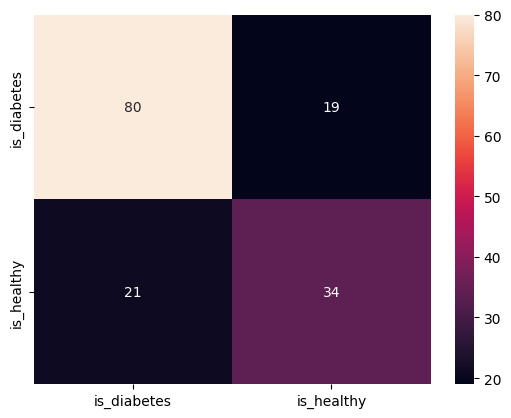

In [46]:

cm = np.array(confusion_matrix(y_test, y_pred))
confusion = pd.DataFrame(cm, index=['is_diabetes', 'is_healthy'], columns=['is_diabetes', 'is_healthy'])
confusion
sns.heatmap(confusion, annot=True)
plt.show()